# 項目反応理論

古典的テスト理論（CTT）では項目の指標（困難度、識別力）や信頼性係数、測定の標準誤差などのいずれもがテストの受験者集団の性質に依存する問題があった。

IRTではテストに含まれる項目の難易度と受験者の能力を分離して表現できる。

## 項目特性曲線

IRTでは **項目特性曲線（item characteristic curve: ICC）** を使うことで受験者の能力と項目の困難度を分離する。

最も標準的なIRTモデルである2PLM（2 parameters logistic model）は

$$
P_j(\theta)=\frac{1}{1+\exp \left(-1.7 a_j\left(\theta-b_j\right)\right)}, \quad-\infty<\theta<\infty
$$

であり、これを図にしたものがICCになる。


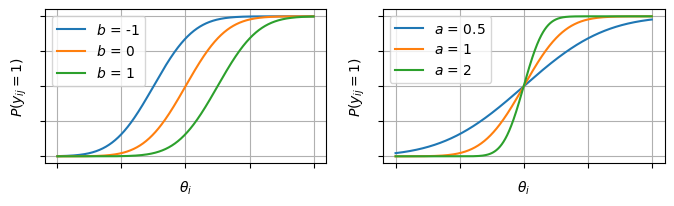

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
x = np.linspace(-4, 4, 1000)

fig, axes = plt.subplots(figsize=[8, 2], ncols=2)


a = 1
for beta in [-1, 0, 1]:
    axes[0].plot(x, norm.cdf(x, loc=beta, scale=1/a), label=r"$b$ = " + f"{beta}")
axes[0].set(xlabel=r"$\theta_i$", ylabel=r"$P(y_{ij} = 1)$", xticklabels=[], yticklabels=[])
axes[0].legend()
axes[0].grid(True)

beta = 0
for a in [0.5, 1, 2]:
    axes[1].plot(x, norm.cdf(x, loc=beta, scale=1/a), label=r"$a$ = " + f"{a}")
axes[1].set(xlabel=r"$\theta_i$", ylabel=r"$P(y_{ij} = 1)$", xticklabels=[], yticklabels=[])
axes[1].legend()
axes[1].grid(True)

fig.show()

困難度$b$が能力値$\theta$と等しくなる点で正答率$P(y=1)=0.5$となるようになっている

- 識別力$a$が高いほどシグモイド関数の傾きが急で、能力値がある値を超えると明確に正答率が変わっていることを示す
    - $\theta = b$のときにどれだけ$\theta$に敏感なのかを示す
- 困難度$b$が高いほどシグモイド関数が右側にシフトしており、能力値が高くないと正答できないことを示す
    - $\theta = b$の点が$P=0.5$なので、$\theta < b$なら$P < 0.5$、逆も然り

ICCは2種類の解釈がある

1. 能力値が$\theta$である個々の受験者の正答確率
2. 能力値が$\theta$である受験者母集団における正答者の比率

後者が頻度主義的であり一般的で無理のない解釈

## 局所独立性

最尤推定を使う場合、尤度関数（≒反応パターンの同時分布）を各項目の積

$$
\begin{aligned}
L(\mathbf{T}, \boldsymbol{\theta} \mid \mathbf{U})
&=\prod_{i=1}^I \prod_{j=1}^J P_j(\theta_i \mid \mathbf{T})^{u_{i j}} \cdot \{ 1 - P_j(\theta_i \mid \mathbf{T}) \} ^{1-u_{i j}}
\end{aligned}
$$

とするために、$\theta$で条件づけた下での項目間の独立性を仮定している。
（なお$\mathbf{T}$は項目パラメータ、$u_{i j}$は二値の反応、$\mathbf{U}$は反応パターン行列、$P_j(\theta_i \mid \mathbf{T})$はICC）


### $Q_3$統計量

$Q_3$統計量は局所独立性の検証に使われる統計量

:::{admonition}

$Q_3$統計量は任意の項目のペア$j$と$j^\prime$の間の局所独立性の指標として

$$
Q_{3, j j^{\prime}} := r(d_j, d_{j^{\prime}})
$$

と定義される。

- $r(\cdot, \cdot)$：相関係数
- $d_{ij} := u_{ij} - \hat{P}_j(\hat{\theta}_i)$ ：推定値によるICC$\hat{P}_j(\hat{\theta}_i)$と実測値$u_{ij}$の残差得点

:::

$Q_3$統計量は

- $\theta$によって項目間の相関関係が十分に説明されているとすれば、その影響を除去した残差得点同士の相関は0に近くなるはず
- $\theta$以外に項目間に相関をもたらす要因がある場合は$\theta$の影響を除いてもなお相関が残る

という考え方をとっている。

目安としては、「$Q_3 > 0.20$の項目ペアは局所独立性の侵害を疑う必要がある」とされる。

## モデル

$i$番目の被験者の$j$番目の項目の値$y_{ij}$が二値$\{0, 1\}$であるとする（例えば正解・不正解だったり、アンケートの「あてはまる」「あてはまらない」という2件法など）。

$y_{ij}$の背後には潜在的な能力の連続量$\theta_i \in \mathbb{R}$が存在し、$\theta_i$が閾値$b_j$を超えていたら1、超えていなければ0が観測されるとする。つまり$y_{ij}$が以下のように決まるとする。

$$
y_{ij}
= \begin{cases}
0 & \text{ if } \theta_i < b_j\\
1 & \text{ if } \theta_i \geq b_j\\
\end{cases}
$$

### 1パラメータ正規累積モデル

しかし、実際には被験者$i$の体調や運（たまたま正解できた）などにより、常にこのようにきれいに正解・不正解が決まるわけではないと考えられる。こうした誤差を表すパラメータ$\varepsilon_{ij} \sim N(0, \sigma^2_{\varepsilon})$も追加して

$$
y_{ij}
= \begin{cases}
0 & \text{ if } (\theta_i - \varepsilon_{ij}) < b_j\\
1 & \text{ if } (\theta_i - \varepsilon_{ij}) \geq b_j\\
\end{cases}
$$

とする。誤差が確率変数のため、$y_{ij}$のとる値も確率変数として考えることができるようになる。$b_j$を移項すると

$$
y_{ij}
= \begin{cases}
0 & \text{ if } (\theta_i - \varepsilon_{ij} - b_j) < 0\\
1 & \text{ if } (\theta_i - \varepsilon_{ij} - b_j) \geq 0\\
\end{cases}
$$

となる。$\theta_i - \varepsilon_{ij} - b_j \sim N(\theta_i - b_j, \sigma^2_{\varepsilon})$である。
$\varepsilon_{ij}$を移項すれば

$$
y_{ij}
= \begin{cases}
0 & \text{ if } (\theta_i - b_j) < \varepsilon_{ij}\\
1 & \text{ if } (\theta_i - b_j) \geq \varepsilon_{ij}\\
\end{cases}
$$

でもあるので「$y_{ij}=1$となるのは誤差$\varepsilon_{ij}$が$\theta_i - b_j$以下のとき」とわかる。

仮に$\varepsilon_{ij}$が標準正規分布（$\sigma^2_{\varepsilon} = 1$の正規分布）に従うならば、特性値$\theta_i$の人が項目$j$に当てはまると回答する確率は

$$
\begin{aligned}
P(y_{ij} = 1)
&= P(\varepsilon_{ij} \leq \theta_i - b_j)\\
&= \int_{-\infty}^{\left(\theta_i-b_j\right)} \frac{1}{\sqrt{2 \pi}} \exp \left(-\frac{z^2}{2}\right) d z
\end{aligned}
$$

となる（最後のは、$\varepsilon_{ij}$が従う標準正規分布のうち $-\infty$ から $ｋ\theta_i-b_j$ までの範囲の面積が$P(\varepsilon_{ij} \leq \theta_i - b_j)$ということ）。



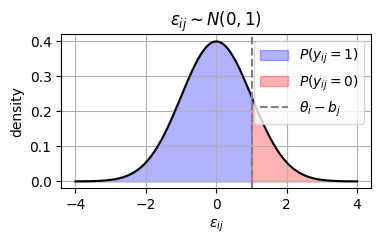

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
epsilon = np.linspace(-4, 4, 1000)
y = norm.pdf(epsilon)
fig, ax = plt.subplots(figsize=[4,2])
ax.plot(epsilon, y, 'k-')

c = 1

ax.fill_between(epsilon, y, where=(epsilon < c), color='blue', alpha=0.3, label=r'$P(y_{ij} = 1)$')
ax.fill_between(epsilon, y, where=(epsilon >= c), color='red', alpha=0.3, label=r'$P(y_{ij} = 0)$')
ax.axvline(x=c, color='grey', linestyle='--', label=r'$\theta_i - b_j$')
ax.set(
    title=r'$\varepsilon_{ij} \sim N(0, 1)$',
    xlabel=r"$\varepsilon_{ij}$",
    ylabel="density"
)
ax.legend()
ax.grid(True)
fig.show()

### 2パラメータ正規累積モデル

$\sigma^2_{\varepsilon}$が項目ごとに異なる場合を考える。$\sigma^2_{\varepsilon}=1/a_j$とすると、誤差の確率分布は

$$
\varepsilon_{ij} \sim N\left(0, \frac{1}{a_j}\right)
$$

となる。両辺を$a_j$倍すると、$a_j \varepsilon_{ij} \sim N(0, 1)$と表すことができ、引き続き標準正規分布を使うことができる。そのためモデルは$a_i$が追加され

$$
\begin{aligned}
P(y_{ij} = 1)
&= P(a_j \varepsilon_{ij} \leq \theta_i - b_j)\\
&= \int_{-\infty}^{ a_j  (\theta_i-b_j)} \frac{1}{\sqrt{2 \pi}} \exp \left(-\frac{z^2}{2}\right) d z
\end{aligned}
$$

となる。

:::{admonition} パラメータの意味
:class: info

$b_j$が大きくなると$\theta_i - b_j$の値は小さくなり、$P(y_{ij} = 1)$の面積が小さくなる。$y_{ij} = 1$が正解を表しているとするなら、正答率が低くなる方向に作用する。そのため$b_j$は **項目困難度（item difficulty）** と呼ばれる。

また$a_j$は値が大きくなると$\varepsilon_{ij}$の分散を下げて分布がより尖っていく。また横軸に$\theta_i - b_j$、縦軸に$P(y_{ij} = 1)$のグラフを書くとき、この曲線の傾きを急にして、$\theta_i$が低い人と高い人の間で$P(y_{ij} = 1)$の変化を大きくする。そのため$a_j$は **項目識別力（item discrimination）** と呼ばれる。


:::

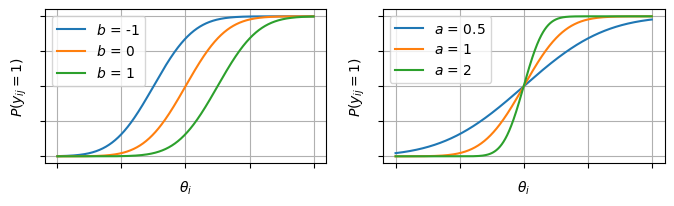

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
x = np.linspace(-4, 4, 1000)

fig, axes = plt.subplots(figsize=[8, 2], ncols=2)


a = 1
for beta in [-1, 0, 1]:
    axes[0].plot(x, norm.cdf(x, loc=beta, scale=1/a), label=r"$b$ = " + f"{beta}")
axes[0].set(xlabel=r"$\theta_i$", ylabel=r"$P(y_{ij} = 1)$", xticklabels=[], yticklabels=[])
axes[0].legend()
axes[0].grid(True)

beta = 0
for a in [0.5, 1, 2]:
    axes[1].plot(x, norm.cdf(x, loc=beta, scale=1/a), label=r"$a$ = " + f"{a}")
axes[1].set(xlabel=r"$\theta_i$", ylabel=r"$P(y_{ij} = 1)$", xticklabels=[], yticklabels=[])
axes[1].legend()
axes[1].grid(True)

fig.show()

なお横軸に$\theta_i$、縦軸に$P(y_{ij}=1)$をとったグラフは **項目特性曲線 （item characteristic curve: ICC）** と呼ばれる。

## 能力パラメータの推定

### 最尤推定法による推定

例として2PLMを考え、項目パラメータ$a,b$が既知であり、$\theta$を推定したい場合であるとする。

局所独立性の仮定のもとで、受験者$i$の能力値$\theta_i$のもとでの項目反応$\mathbf{u}_i$の同時分布は

$$
P(\mathbf{u}_i \mid \theta_i)=\prod_{j=1}^J P_j(\theta_i)^{u_{i j}} Q_j(\theta_i)^{1-u_{i j}}
$$

となる。ここで$P_j(\theta_i)$は能力値$\theta_i$の受験者が項目$j$に正答する確率であり、2PLMのICC

$$
P_j(\theta)=\frac{1}{1+\exp \left(-1.7 a_j\left(\theta-b_j\right)\right)}, \quad-\infty<\theta<\infty
$$

で表現される。$Q_j(\theta_i)$は誤答する確率であり、$Q_j(\theta_i):= 1 - P_j(\theta_i)$である。

項目反応が既知であれば$P(\mathbf{u}_i \mid \theta_i)$は尤度$L(\theta_i \mid \mathbf{u}_i)$となる。

## 項目パラメータの推定

主に2つのアプローチがある

1. 能力パラメータ$\theta$と項目パラメータ$a,b$を同時に推定する方法（主に1PLM）
    - 最尤推定だと **同時最尤推定法（joint maximum likelihood estimation）**
    - ベイズ推定だと **階層ベイズ推定法（hierarchical Bayes estimation）**
2. 能力パラメータ$\theta$は **消去** して項目パラメータ$a,b$を推定する方法（基本こっちが使われる）
    - 最尤推定だと **周辺最尤推定法（marginal maximum likelihood estimation）**
    - ベイズ推定だと **周辺ベイズ推定法（marginal Bayes estimation）**


最尤推定法の場合、1~3PLMではEMアルゴリズムが多く（統計ソフトウェアでもデフォルト）、4PLMや多次元IRTモデルといった複雑なモデルではMHRM（Metropolis–Hastings Robbins–Monro）などが使われる

### 最尤推定法について

尤度関数は項目パラメータ$\mathbf{T}$、反応パターン行列$\mathbf{U}$をもとに次のように表される

:::{card} 尤度関数

$$
\begin{aligned}
L(\mathbf{T}, \boldsymbol{\theta} \mid \mathbf{U})
&=\prod_{i=1}^I L(\mathbf{T}, \theta_i \mid \mathbf{u}_i) \\
&=\prod_{i=1}^I \prod_{j=1}^J P_j(\theta_i \mid \mathbf{T})^{u_{i j}} Q_j(\theta_i \mid \mathbf{T})^{1-u_{i j}}
\end{aligned}
$$

:::


#### 同時最尤推定法

以下の手順で解く。

1. パラメータの初期値を与える
2. $\mathbf{\theta}$を所与として$\mathbf{T}$を推定する
3. $\mathbf{T}$を所与として$\mathbf{\theta}$を推定する
4. 2.と3.を収束するまで繰り返す

同時最尤推定法は1PLMでは十分機能するが、2PLM以上だと解が収束しないことがあったり、項目パラメータが一致性をもたないなどの問題がある。
そのため、実際に多くのIRTソフトウェア（IRTPRO, BILOG-MG, ICLなど）で用いられているのは周辺最尤推定法である。

#### 周辺最尤推定法

Bock & Lieberman (1970)が提案した周辺最尤推定法では尤度関数から$\theta$を積分消去した尤度関数（周辺尤度関数）を使用して項目パラメータを求める。周辺尤度関数$L_M$は次のように定義される。

$$
\begin{aligned}
L_M(\mathbf{T} \mid \mathbf{U}) & =\prod_{i=1}^I \int_{-\infty}^{\infty} L(\mathbf{T}, \theta_i \mid \mathbf{u}_i) f(\theta_i) d \theta_i \\
& =\prod_{i=1}^I \int_{-\infty}^{\infty} \left \{\prod_{j=1}^J P_j(\theta_i)^{u_{i j}} Q_j(\theta_i)^{1-u_{i j}} \right\} f(\theta_i) d \theta_i
\end{aligned}
$$

ここで$f(\theta_i)$はあらかじめ定めた$\theta$の母集団分布（事前分布）であり、通常は標準正規分布$\mathcal{N}(0,1)$が用いられる。
$\theta$に分布を仮定して期待値をとることで$\theta$を除去している。

しかし、周辺尤度の対数をとった対数周辺尤度関数

$$
\ln L_M(\mathbf{T} \mid \mathbf{U})=\sum_{i=1}^I \ln \left\{\int_{-\infty}^{\infty} L\left(\mathbf{T}, \theta_i \mid \mathbf{u}_i\right) f\left(\theta_i\right) d \theta_i\right\}
$$

を使ってのパラメータ推定は計算が難しかった。
そこでBock & Aitkin (1981)が **EMアルゴリズム** (Dempster et al., 1977)の利用を提案した。

#### EMアルゴリズム

対数周辺尤度関数のうち積分の対象となっている関数

$$
L_C(\mathbf{T} \mid \mathbf{u}_i, \theta_i)=L(\mathbf{T}, \theta_i \mid \mathbf{u}_i) f(\theta_i)
$$

は項目パラメータが与えられたときの反応$\mathbf{u}_i$と能力パラメータ$\theta_i$の同時確率分布を表している。仮に、$\mathbf{U}$に加えて **$\boldsymbol{\theta}$も既知である** とするなら、項目パラメータに関してのみ最大化すればいいので$L_C(\mathbf{T} \mid \mathbf{u}_i, \theta_i)$を全受験者について積をとった

$$
L_C(\mathbf{T} \mid \mathbf{U}, \boldsymbol{\theta})=\prod_{i=1}^I L_C(\mathbf{T} \mid \mathbf{u}_i, \theta_i)
$$

を最大化して最尤推定値を得ることができる。このように考えたとき、$L_C(\mathbf{T} \mid \mathbf{U}, \boldsymbol{\theta})$を **完全データ尤度関数（complete data likelihood function）** といい、その対数をとった

$$
\begin{aligned}
\ell(\mathbf{T} \mid \mathbf{U}, \boldsymbol{\theta})
&= \ln L_C(\mathbf{T} \mid \mathbf{U}, \boldsymbol{\theta}) \\
&=\sum_{i=1}^I \ln L_C\left(\mathbf{T} \mid \mathbf{u}_i, \theta_i\right)
\end{aligned}
$$

を **対数完全データ尤度関数（log complete data likelihood function）** という。

$\boldsymbol{\theta}$は実際には未知であるため、EMアルゴリズムでは対数完全データ尤度関数の$\boldsymbol{\theta}$に関する期待値をもとめて尤度関数から$\boldsymbol{\theta}$を消去する（このステップはexpectationの頭文字をとって **Eステップ** と呼ばれる）。そして項目パラメータ$\mathbf{T}$を最尤推定して求める（maximizationの頭文字を取って **Mステップ** という）。EMアルゴリズムではEステップとMステップを交互に繰り返す。

:::{card} E-step (expectation step)

E-step では、項目パラメータの現在の推定値$\mathbf{T}^{\text{old}}$とデータで条件づけた能力パラメータ$\theta$の条件付き分布$f(\theta \mid \mathbf{U}, \mathbf{T}^{\text{old}})$ と完全データ対数尤度 $\ln L_C(\mathbf{T} \mid \mathbf{U}, \boldsymbol{\theta}) $を用いて、

$$
\begin{aligned}
Q(\mathbf{T}\mid \mathbf{T}^{\text{old}})
&= \operatorname{E}_{\theta} \big[ \ln L_C(\mathbf{T} \mid \mathbf{U}, \boldsymbol{\theta})  \big]\\
&= \int_{-\infty}^{\infty} \ln L_C(\mathbf{T} \mid \mathbf{U}, \boldsymbol{\theta})
    f(\theta \mid \mathbf{U}, \mathbf{T}^{\text{old}})
    d \theta
\end{aligned}
$$

という計算を行う。この積分計算はGauss–Hermiteなどの数値積分法で近似される。
:::

:::{card} M-step (maximization step)

$Q(\mathbf{T}\mid \mathbf{T}^{\text{old}})$を最大化するパラメータ$\mathbf{T}^{\text{new}}$を求める

$$
\mathbf{T}^{\text{new}} := \operatorname*{\text{arg max}}_{\mathbf{T}} Q(\mathbf{T}\mid \mathbf{T}^{\text{old}})
$$


:::

$\mathbf{T}^{\text{new}}$は次のE-stepでの$\mathbf{T}^{\text{old}}$となる。収束基準が満たされるまで、E-stepとM-stepを繰り返す

## 参考

- [項目反応理論モデルのパラメタ推定法の展開](https://www.jstage.jst.go.jp/article/jart/18/1/18_103/_article/-char/ja/)

### 例：`mirt`パッケージに実装された様々なパラメータ推定法

Rの`mirt`パッケージは多次元IRTモデルも推定可能で、モダンなパラメータ推定方法も実装されている

[mirt()関数のドキュメント](https://www.rdocumentation.org/packages/mirt/versions/1.43/topics/mirt)を見ると`method`の欄に色々書いてある

- `'EM'`: the standard EM algorithm with fixed quadrature (default)
    - 固定求積法を用いた標準EMアルゴリズム。
- `'QMCEM'`: quasi-Monte Carlo EM estimation
- `'MHRM'`：Metropolis–Hastings Robbins–Monro Algorithm
    - [Cai, L. (2010). High-dimensional Exploratory Item Factor Analysis by A Metropolis–Hastings Robbins–Monro Algorithm. Psychometrika, 75(1), 33–57.](doi:10.1007/s11336-009-9136-x)
- `'SEM'`: Stochastic EM algorithm (first two stages of the MH-RM stage using an optimizer other than a single Newton-Raphson iteration)


1~3次元IRTまではEMで足りる様子。

> The 'EM' is generally effective with 1-3 factors, but methods such as the 'QMCEM', 'MCEM', 'SEM', or 'MHRM' should be used when the dimensions are 3 or more.